In [1]:
#from dat_to_csv import to_csv
from collections import Counter

# Data processing
import pandas as pd
import numpy as np
import smote_variants as sv

# Data visualization
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance

In [2]:
def plot(X, y, name):
    colors = {0: 'orange', 1: 'blue'}
    plt.rcParams["figure.figsize"] = (9,6)
    plt.title(name)
    plt.xlabel('x1')
    plt.ylabel('x2')
    labels = np.unique(y)
    for l in labels:
        indices = list(np.where(y == l))[0]
        x1 = X[indices][:, 0]
        x2 = X[indices][:, 1]
        plt.scatter(x1, x2, color=colors[l], label='{}'.format(l), alpha=0.7)

    plt.legend(['majority', 'minority'],fancybox=True, framealpha=0.5)

    plt.show()

In [3]:
def plot_mmp(X, y, name):
    colors = {0: 'orange', 1: 'blue', 2:'red', 3:'green'}
    plt.rcParams["figure.figsize"] = (9,6)
    plt.title(name)
    plt.xlabel('x1')
    plt.ylabel('x2')
    labels = np.unique(y)
    for l in labels:
        indices = list(np.where(y == l))[0]
        x1 = X[indices][:, 0]
        x2 = X[indices][:, 1]
        plt.scatter(x1, x2, color=colors[l], label='{}'.format(l), alpha=0.7)

    plt.legend(['majority', 'minority', 'minority_centroid', 'majority_centroid'], fancybox=True, framealpha=0.5)

    plt.show()

In [5]:
def plot_km_mmp(X, y, name):
    colors = {0: 'orange', 1: 'blue', 2:'red', 3:'green'}
    plt.rcParams["figure.figsize"] = (9,6)
    plt.title(name)
    plt.xlabel('x1')
    plt.ylabel('x2')
    labels = np.unique(y)
    for l in labels:
        indices = list(np.where(y == l))[0]
        x1 = X[indices][:, 0]
        x2 = X[indices][:, 1]
        plt.scatter(x1, x2, color=colors[l], label='{}'.format(l), alpha=0.7)

    plt.legend(['majority', 'minority', 'minority_centroids', 'majority_centroids'], fancybox=True, framealpha=0.5)

    plt.show()

In [3]:
X, y = make_moons(n_samples=500, noise=0.5, shuffle=True, random_state=10)
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 250, 1: 250})


In [4]:
X, y = make_imbalance(X, y, sampling_strategy={0: 250, 1: 25}, random_state=42)

In [7]:
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 250, 1: 25})


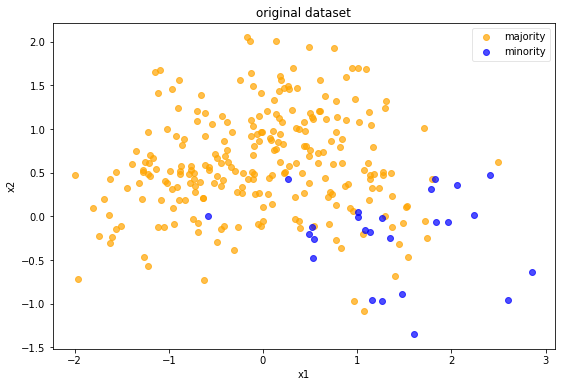

In [8]:
plot(X,y,'original dataset')

SWIM Counter({0: 250, 1: 250})


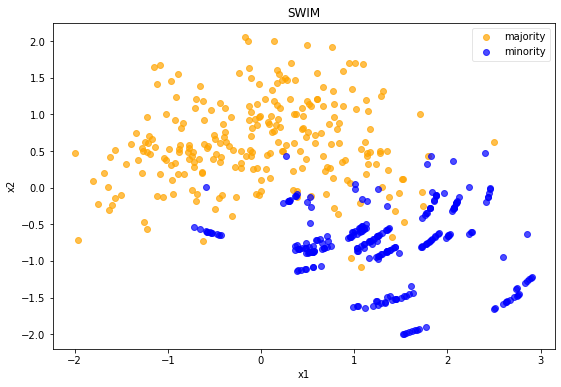

In [9]:
from swim import SWIM
sampler = SWIM()
X_rs, y_rs = sampler.sample(X, y)
print('SWIM {}'.format(Counter(y_rs)))
plot(X_rs,y_rs,'SWIM')

2023-06-15 05:27:16,301:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-06-15 05:27:16,304:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-06-15 05:27:16,314:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-06-15 05:27:16,318:INFO:SMOTE: simplex sampling with n_dim 2


SMOTE Counter({0: 250, 1: 250})


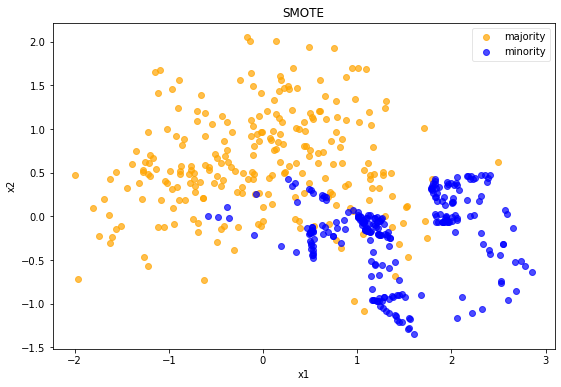

In [10]:
sampler = sv.SMOTE()
X_rs, y_rs = sampler.sample(X, y)
print('SMOTE {}'.format(Counter(y_rs)))
plot(X_rs,y_rs,'SMOTE')

SMOTEFUNA Counter({0: 250, 1: 250})


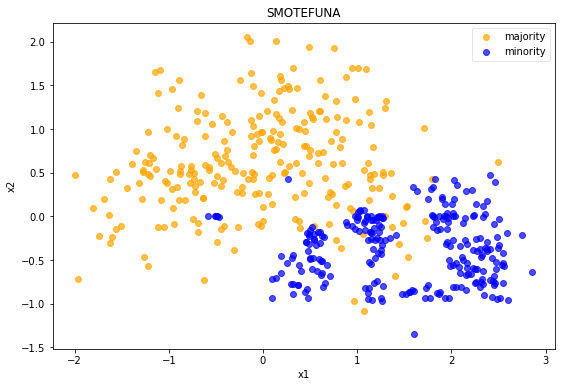

In [11]:
from smfuna import SMOTEFUNA
sampler = SMOTEFUNA()
X_rs, y_rs = sampler.sample(X, y)
print('SMOTEFUNA {}'.format(Counter(y_rs)))
plot(X_rs,y_rs,'SMOTEFUNA')

In [12]:
from mmp import MaMiPot

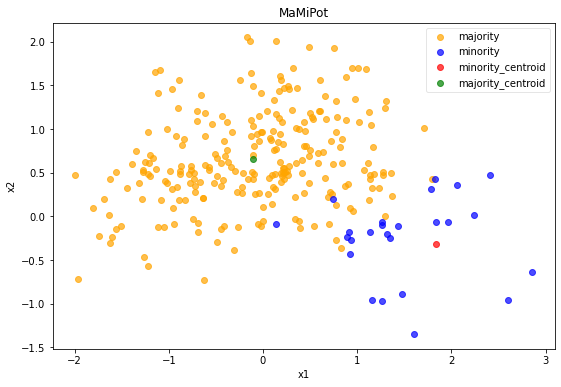

In [17]:
clf = LogisticRegression(random_state=0)
mp = MaMiPot(clf)
X_rs, y_rs = mp.fit_resample(X, y)
plot_mmp(X_rs,y_rs,'MaMiPot')

2023-06-15 05:31:32,474:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.25, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-06-15 05:31:32,478:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-06-15 05:31:32,491:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-06-15 05:31:32,496:INFO:SMOTE: simplex sampling with n_dim 2


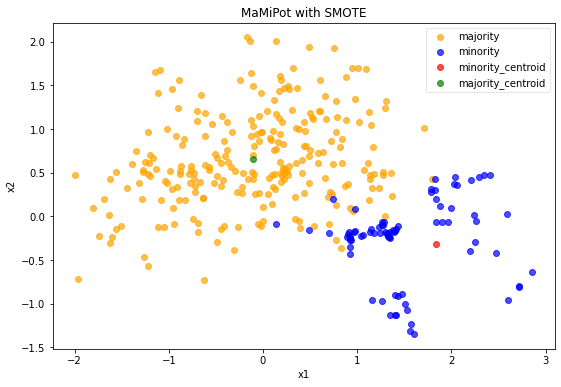

In [18]:
clf = LogisticRegression(random_state=0)
sma = sv.SMOTE()
mp = MaMiPot(clf, sma=sma, beta=0.25)
X_rs, y_rs = mp.fit_resample(X, y)
plot_mmp(X_rs,y_rs,'MaMiPot with SMOTE')

In [2]:
from km_mmp import Kmeans_MaMiPot

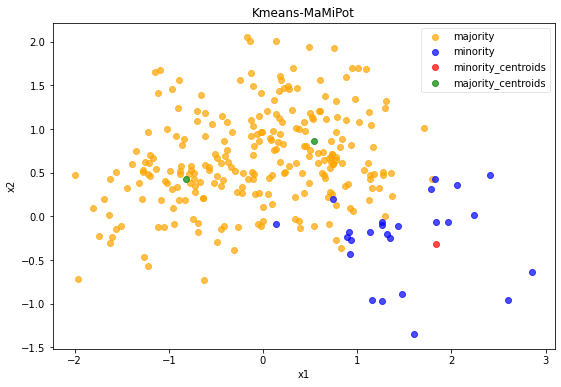

In [6]:
clf = LogisticRegression(random_state=0)
mp = Kmeans_MaMiPot(clf, p_clusters=1, n_clusters=2)
X_rs, y_rs = mp.fit_resample(X, y)
plot_km_mmp(X_rs,y_rs,'Kmeans-MaMiPot')

In [21]:
from gan import GAN
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

In [39]:
q_trans = QuantileTransformer(n_quantiles=1000, output_distribution='uniform')
X_p = q_trans.fit_transform(X)
scaler = MinMaxScaler(feature_range=(-1, 1), clip=True)
X_p = scaler.fit_transform(X_p)

c:\users\piotr\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (275). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [40]:
gan = GAN(epochs=50, batch_size=5)
X_rs, y_rs = gan.fit_resample(X_p, y)

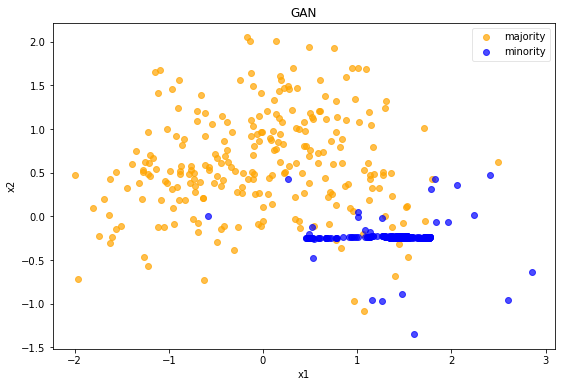

In [41]:
X_pp = scaler.inverse_transform(X_rs)
X_pp = q_trans.inverse_transform(X_pp)
plot(X_pp,y_rs,'GAN')